In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(style="white")
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import copy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Problem:*
The aim is to read our dataset, analyze it and make it ready for processing with Data Cleaning ,Data Integration, Data Transformation and Data Reduction.

Read the data with delimeter = ; and decimal = ,

# `***Data Cleaning***`

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv', delimiter=';', decimal=',')

In [4]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


All values are float64 except date and time we could transform them to float or we can just ignore and drop them. in this case i prefer to ignore them. During data reading, some extra NaN values ​​were read, and we need to drop them as well.

In [6]:
df = df.drop(['Unnamed: 15'], axis=1) #droping unnamed 15
df = df.drop(['Unnamed: 16'], axis=1) #droping unnamed 16
df = df.drop(['Date'], axis=1) #droping Date
df = df.drop(['Time'], axis=1) #droping Time
df = df.dropna(how='all') #droping NaN

In [7]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


According to what is mentioned in the text file -200 values ​​are NaN. so we need to convert them to NaN.

In [8]:
df = df.replace(-200, np.nan) #-200 to NaN

In [9]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


Now all our values ​​are float64.

In [11]:
df.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

There are too many non-values ​​in our dataset. especially in the NHMC column there are 8443 almost 90 percent of the dataset. We have to get rid of them somehow. We will use KNN Imputer

In [12]:
knn = KNNImputer(n_neighbors = 3)

knn.fit(df)
X = knn.transform(df)
df = pd.DataFrame(X, columns = df.columns)

We fill all the nan values ​​with the KNN imputer.

In [13]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,361.000000,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,361.000000,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,361.000000,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,253.333333,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


We draw a scatterplot to see our data distribution. For now, we choose the AH value as an example, since it is not clear what we will draw the distribution against.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


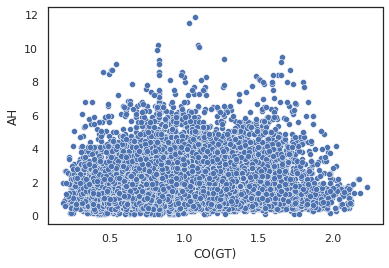

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


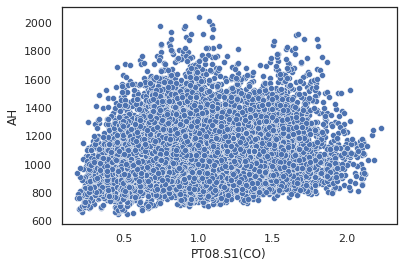

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


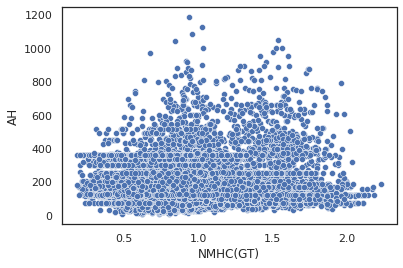

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


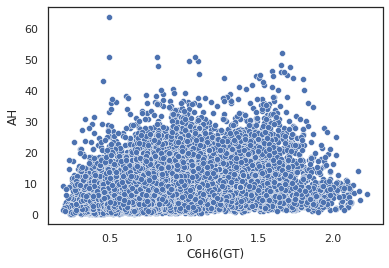

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


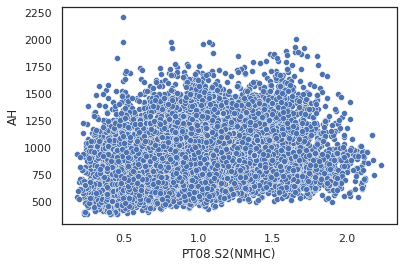

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


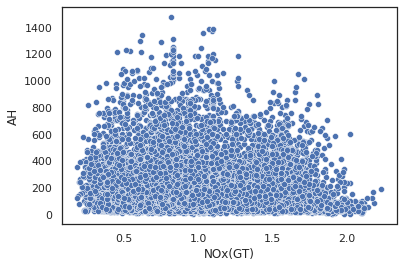

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


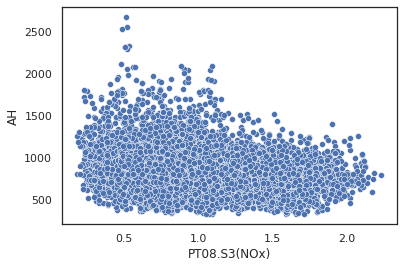

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


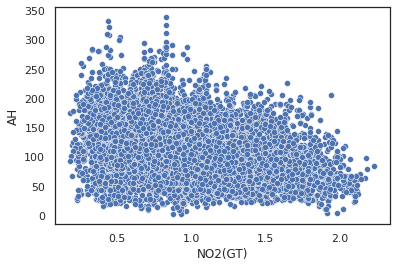

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


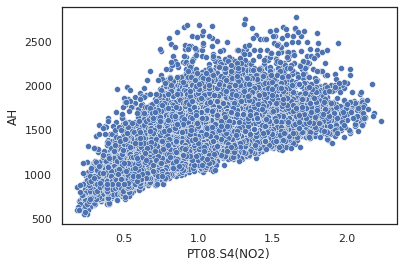

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


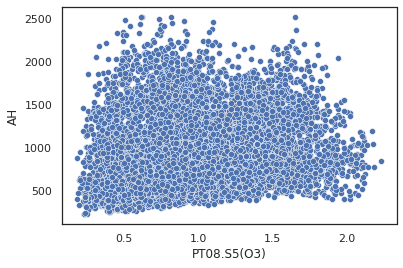

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


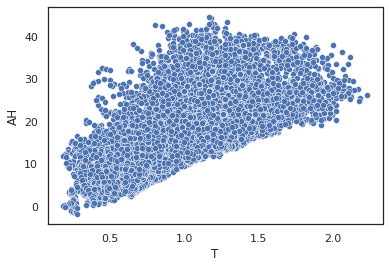

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


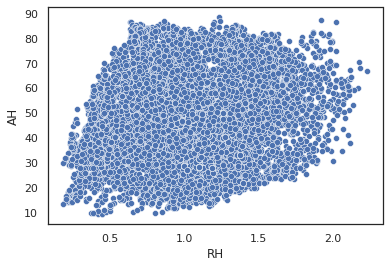

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


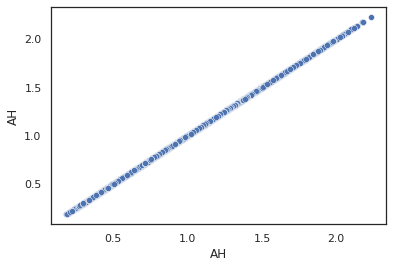

In [15]:
for i in df.columns:
    sns.scatterplot(df["AH"],df[i])
    plt.ylabel("AH")
    plt.xlabel(i)
    plt.show()

Now let's see the data distribution with histogram

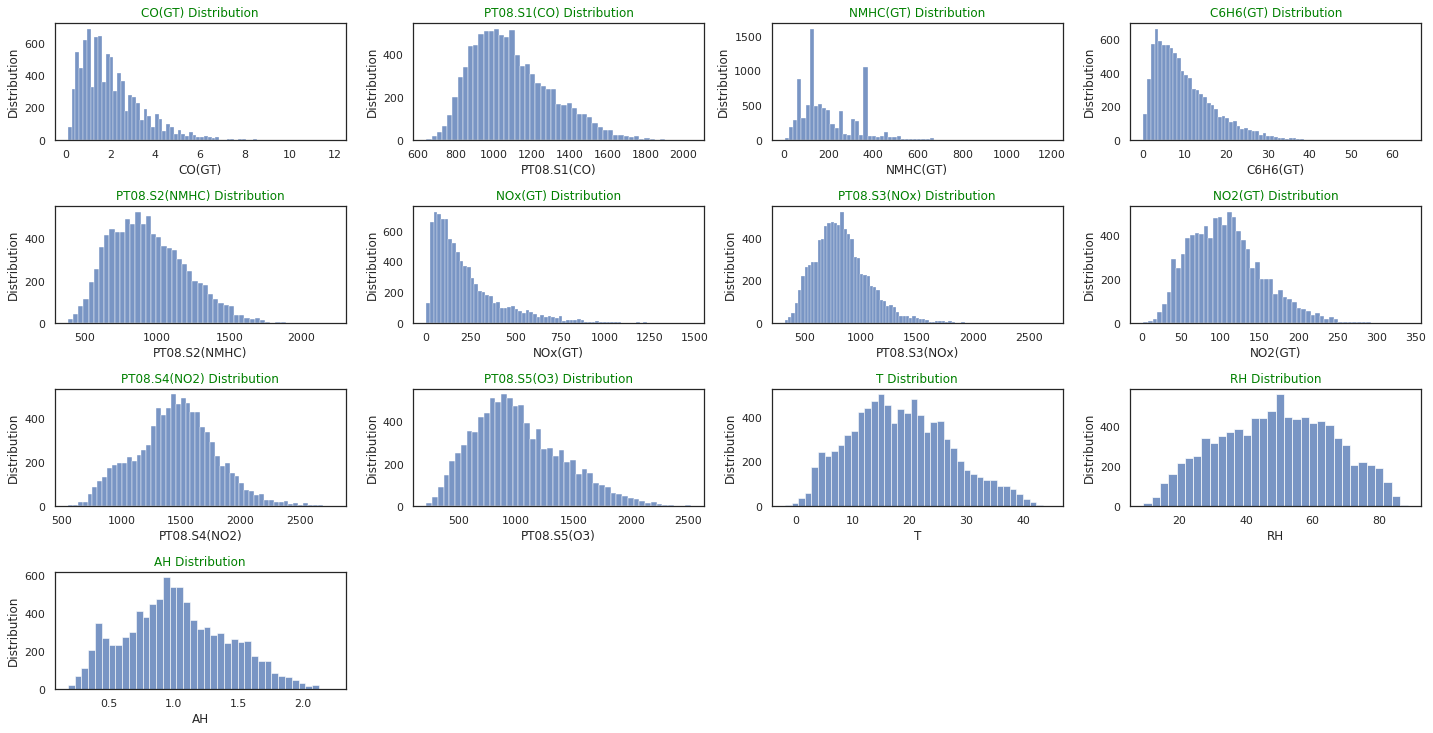

In [16]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(8,4,i+1)
    sns.histplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Green')
    plt.ylabel('Distribution')
f.tight_layout()

We calculate the z-scores to determine whether the data are outliers.

In [17]:
z = np.abs(stats.zscore(df))
print(z)

        CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0     0.360916     1.208919  0.452265  0.231960       0.389077  0.320419   
1     0.061837     0.891992  0.716549  0.102948       0.047876  0.625223   
2     0.079081     1.404668  0.883464  0.156533       0.012115  0.489754   
3     0.079081     1.283490  0.939103  0.129740       0.021630  0.291390   
4     0.343672     0.798778  1.140793  0.491440       0.398310  0.489754   
...        ...          ...       ...       ...            ...       ...   
9352  0.713210     0.994527  1.015203  0.446301       0.595297  1.160056   
9353  0.219998     0.290764  1.015203  0.164978       0.317837  0.584316   
9354  0.219998     0.192889  1.015203  0.298942       0.452818  0.294027   
9355  0.008622     0.454946  0.266400  0.089551       0.070373  0.013414   
9356  0.079081     0.138020  0.625732  0.231960       0.392827  0.158558   

      PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0       

and we drop all values ​​whose z-score is greater than 3.

In [18]:
df =df[(z < 3).all(axis=1)]

In [19]:
df.shape

(8792, 13)

It looks like our dataset is free of about a thousand values


Let's see the distribution of our data set again

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


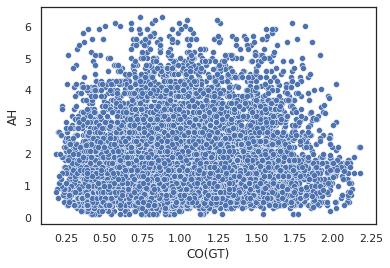

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


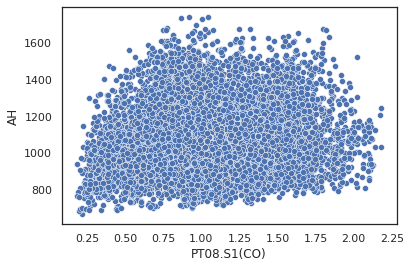

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


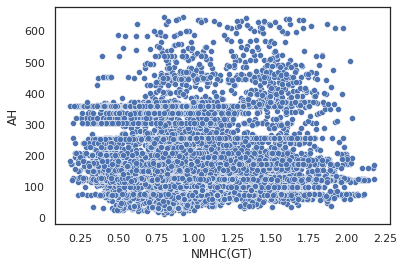

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


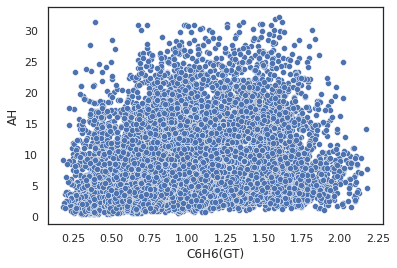

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


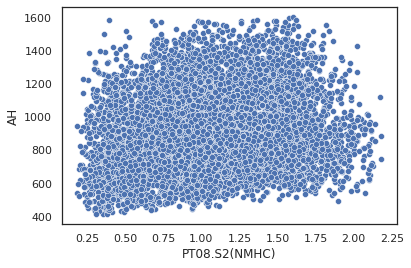

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


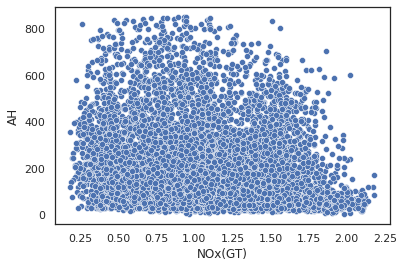

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


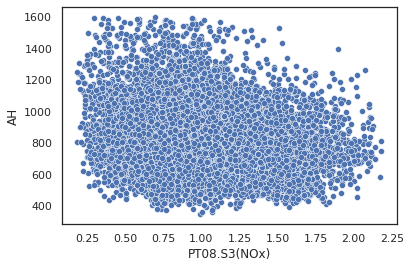

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


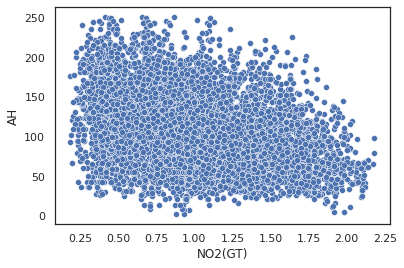

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


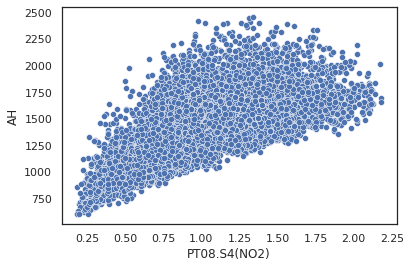

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


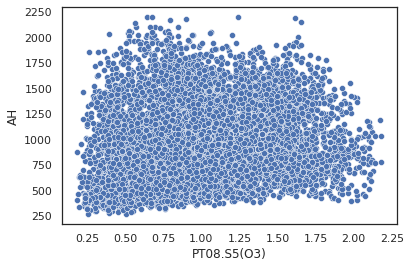

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


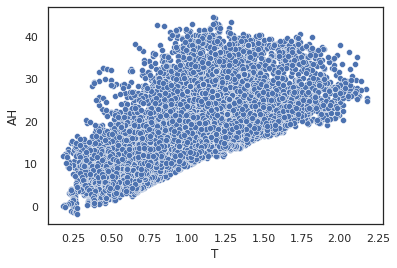

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


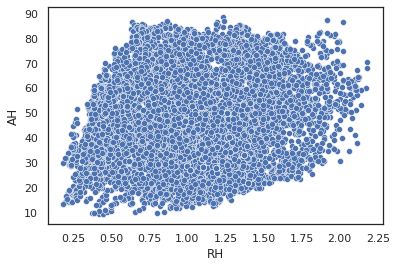

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


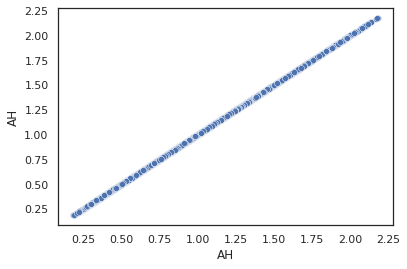

In [20]:
for i in df.columns:
    sns.scatterplot(df["AH"],df[i])
    plt.ylabel("AH")
    plt.xlabel(i)
    plt.show()

Now let's see again the data distribution with histogram

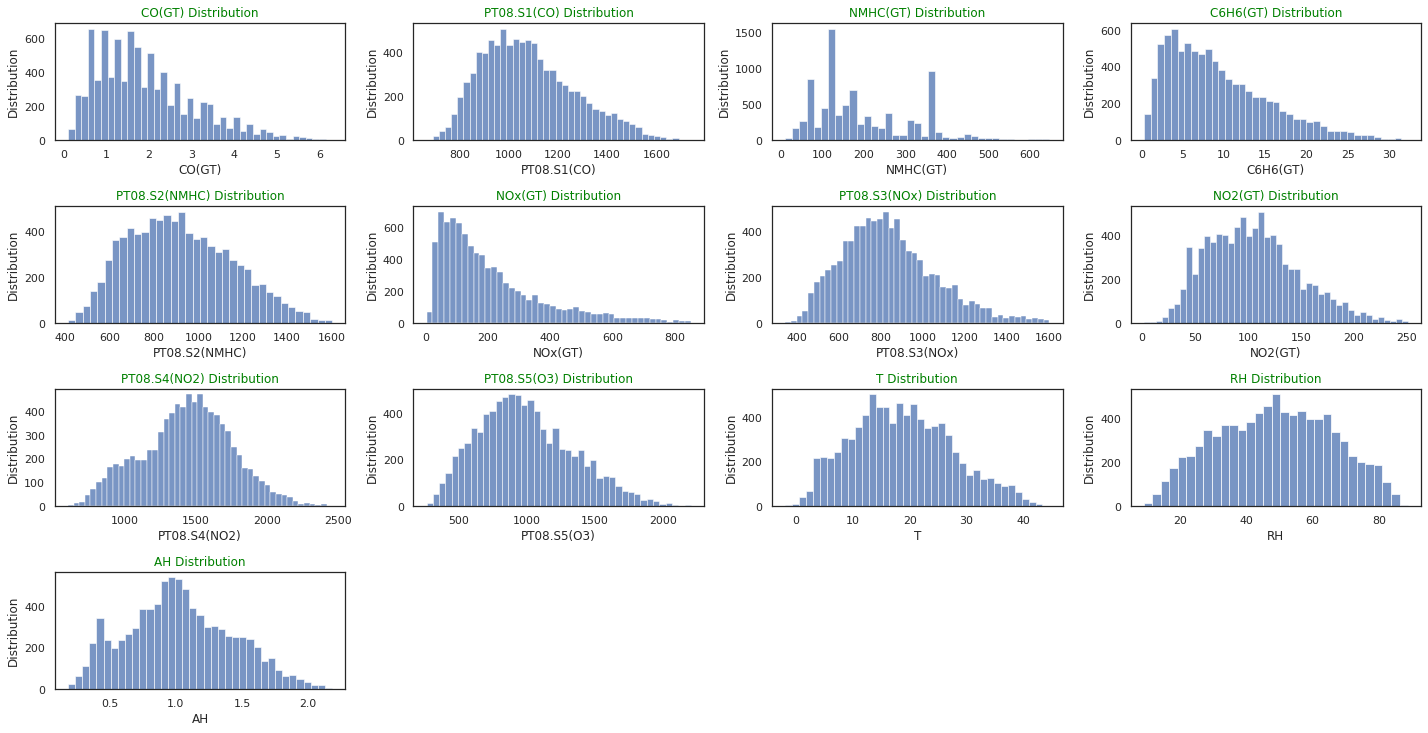

In [21]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(8,4,i+1)
    sns.histplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Green')
    plt.ylabel('Distribution')
f.tight_layout()

There are not many trends in the data distribution. nice thing for our model

Let's observe the correlation with the heat map.

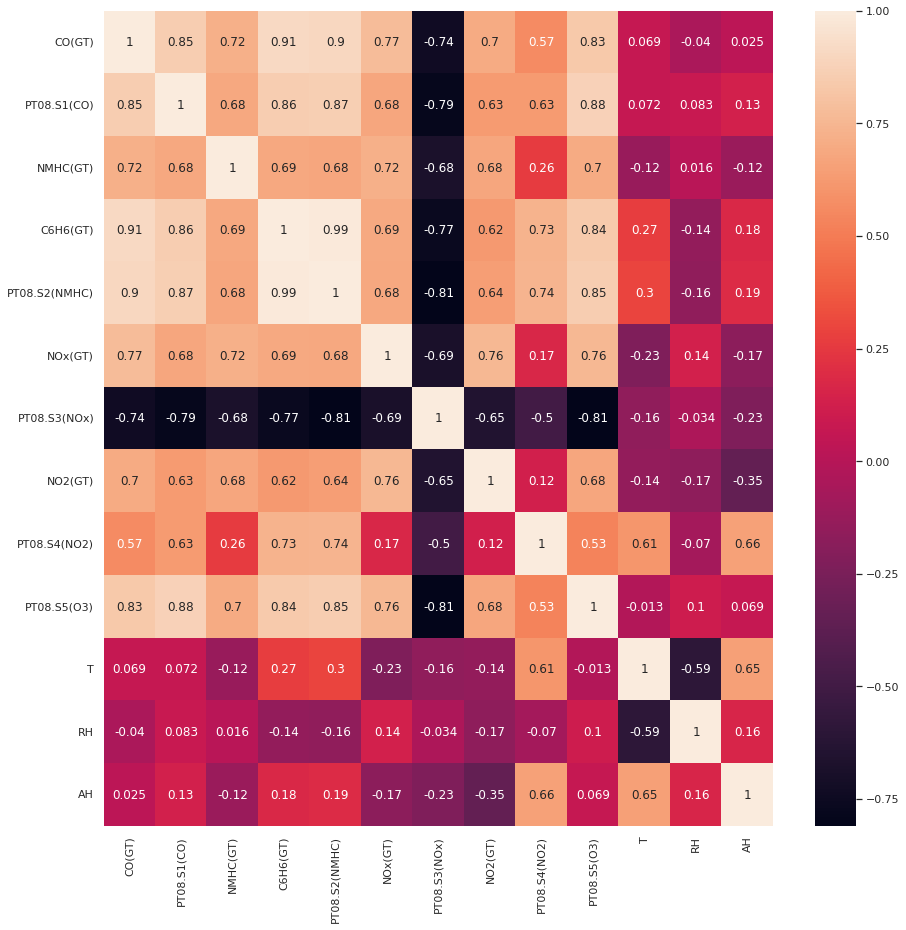

In [22]:
corr=df.corr()
f = plt.figure(figsize=(15, 15))
sns.heatmap(corr,annot=True)
plt.show()

We can say that PTO8.S5 has the highest effect for AH value and PTO8.S4 has the least effect.

# ***`Data transformation`***

In [23]:
X = df.drop('AH', axis = 1).values 
y = df['AH'].values

For min max normalization, we assign the AH column to the y variable and assign the rest to X.

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.40322581, 0.64585275, 0.21878279, ..., 0.5185567 , 0.33333333,
        0.49937107],
       [0.30645161, 0.58247903, 0.15897167, ..., 0.36597938, 0.32688172,
        0.48427673],
       [0.33870968, 0.68499534, 0.12119622, ..., 0.4185567 , 0.29677419,
        0.56352201],
       ...,
       [0.37096774, 0.44268406, 0.55089192, ..., 0.42783505, 0.61935484,
        0.11446541],
       [0.32258065, 0.31314073, 0.38142707, ..., 0.26185567, 0.64946237,
        0.05408805],
       [0.33870968, 0.37651445, 0.46274921, ..., 0.28556701, 0.65376344,
        0.0490566 ]])

We squeezed all our values ​​between 0 and 1 except AH

In [25]:
X = pd.DataFrame(X, columns=[  "CO(GT)"	,"PT08.S1(CO)",	"NMHC(GT)", "C6H6(GT)",	"PT08.S2(NMHC)",	"NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)",	"T",	"RH"])
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.403226,0.645853,0.218783,0.362500,0.532326,0.192941,0.566083,0.445783,0.586875,0.518557,0.333333,0.499371
1,0.306452,0.582479,0.158972,0.284375,0.455919,0.118824,0.660032,0.361446,0.515331,0.365979,0.326882,0.484277
2,0.338710,0.684995,0.121196,0.271875,0.442485,0.151765,0.632962,0.449799,0.513179,0.418557,0.296774,0.563522
3,0.338710,0.660764,0.108604,0.278125,0.450042,0.200000,0.594745,0.481928,0.528779,0.485052,0.277419,0.638994
4,0.241935,0.563840,0.062959,0.193750,0.356003,0.151765,0.684713,0.457831,0.478214,0.437113,0.281720,0.633962
...,...,...,...,...,...,...,...,...,...,...,...,...
8787,0.483871,0.602982,0.550892,0.412500,0.578505,0.552941,0.154459,0.755020,0.415815,0.756186,0.511828,0.252830
8788,0.370968,0.462255,0.550892,0.346875,0.516373,0.412941,0.206210,0.710843,0.356643,0.519072,0.563441,0.182390
8789,0.370968,0.442684,0.550892,0.378125,0.546599,0.342353,0.205414,0.694779,0.344271,0.427835,0.619355,0.114465
8790,0.322581,0.313141,0.381427,0.287500,0.460957,0.274118,0.284236,0.618474,0.236686,0.261856,0.649462,0.054088


In [26]:
X_y = copy.copy(X)

In [27]:
X_y['AH'] = y
X_y

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.403226,0.645853,0.218783,0.362500,0.532326,0.192941,0.566083,0.445783,0.586875,0.518557,0.333333,0.499371,0.7578
1,0.306452,0.582479,0.158972,0.284375,0.455919,0.118824,0.660032,0.361446,0.515331,0.365979,0.326882,0.484277,0.7255
2,0.338710,0.684995,0.121196,0.271875,0.442485,0.151765,0.632962,0.449799,0.513179,0.418557,0.296774,0.563522,0.7502
3,0.338710,0.660764,0.108604,0.278125,0.450042,0.200000,0.594745,0.481928,0.528779,0.485052,0.277419,0.638994,0.7867
4,0.241935,0.563840,0.062959,0.193750,0.356003,0.151765,0.684713,0.457831,0.478214,0.437113,0.281720,0.633962,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,0.483871,0.602982,0.550892,0.412500,0.578505,0.552941,0.154459,0.755020,0.415815,0.756186,0.511828,0.252830,0.7568
8788,0.370968,0.462255,0.550892,0.346875,0.516373,0.412941,0.206210,0.710843,0.356643,0.519072,0.563441,0.182390,0.7119
8789,0.370968,0.442684,0.550892,0.378125,0.546599,0.342353,0.205414,0.694779,0.344271,0.427835,0.619355,0.114465,0.6406
8790,0.322581,0.313141,0.381427,0.287500,0.460957,0.274118,0.284236,0.618474,0.236686,0.261856,0.649462,0.054088,0.5139


We added y's columns to X and converted it to a pandas data frame and We added our AH values ​​back to X and turned it into a dataframe ready as X_y for clustering.

# ***`Clustering`***

In [28]:
km = KMeans(n_clusters=3)
km.fit(X_y)
cluster_label = km.labels_
X_y['KMEANS_LABELS'] = cluster_label

We trained X_y with our n= 3 clustering method and created the KMEANS_LABELS column.

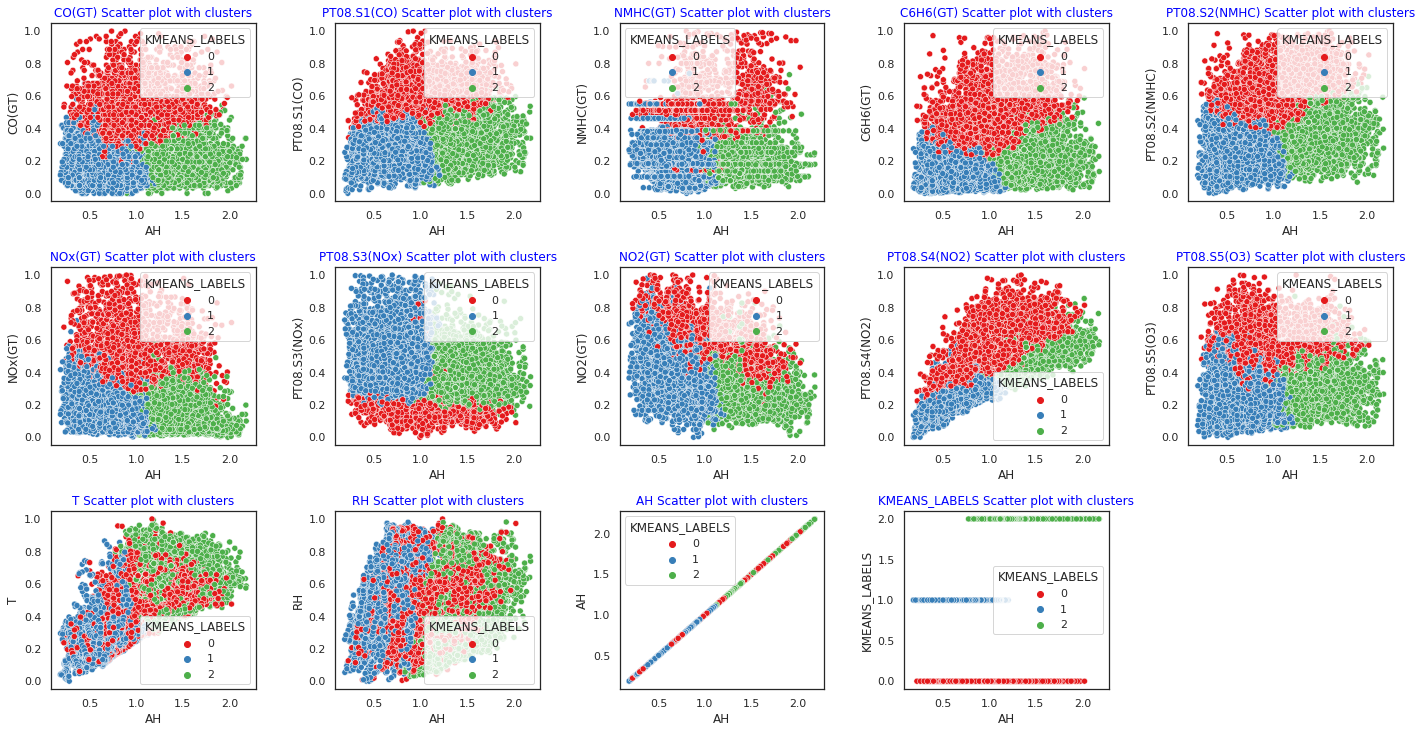

In [29]:
f=plt.figure(figsize=(20,20))
scatter_cols = X_y.columns
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(6,5,i+1)
    sns.scatterplot(x=X_y['AH'],y=X_y[col],hue=X_y['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

We had our AH value drawn on top of the corresponding graphs with the remaining values, showing a table showing which KMEANS class they belong to there. It can be said that there is a clear grouping except for the RH and T columns.

# ***`Conclusion:`***
First of all, we got rid of the extra read data by removing the NaN values ​​in our data set. Then, we converted the -200 values ​​in our dataset to NaN values ​​and filled our NaN values ​​with the KNN imputer method. Then, we made comments by showing the data distributions on our new data set. We did not see any trend towards a value in our dataset, as we did not fill the NaN values ​​with the mean values. Then we saw the correlations in our dataset with the heatmap. After that, we used the min max method for data transform and compressed our values ​​between 0 and 1. The reason we do this is to prevent unrelated values ​​from showing superiority or weakness to each other when we put them into the model. Then, we selected the AH value as the y value with our new set, made an example clustering and saw the class distribution. As a result, our data is ready to be processed.